# Projet 9 : La poule qui chante
## Partie 1 : Préparation, nettoyage et analyse exploratoire
-----
## 1 Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\danie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----
## 2 Importation des données

In [2]:
dispo_alim = pd.read_csv('DAN-P9-data/DisponibiliteAlimentaire_2017.csv')
pop = pd.read_csv('DAN-P9-data/Population_2000_2018.csv')
pib_hab = pd.read_csv('ONU_PIB_hab_2017.csv')

Aperçus des tables 'dispo_alim', 'pop' et 'pib'.

In [3]:
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [5]:
pib_hab.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752219,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936054,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44670.222288,X,Ciffre de sources internationales,NaN


-----
## 3 Nettoyage et préparation des données
### 3.1 Données disponibilité alimentaire
#### 3.1.1 Valeurs uniques et égales
Supprimer les variables qui ne contiennent qu'une seule valeur et les variables doublon.

In [6]:
# Vérification des valeurs uniques des variables

print(dispo_alim['Code Domaine'].unique())
print(dispo_alim['Domaine'].unique())
print(dispo_alim['Code année'].unique())
print(dispo_alim['Année'].unique())
print(dispo_alim['Unité'].unique())
print(dispo_alim['Symbole'].unique())
print(dispo_alim['Description du Symbole'].unique())

['FBS']
['Nouveaux Bilans Alimentaire']
[2017]
[2017]
['Milliers de tonnes' 'kg' 'Kcal/personne/jour' 'g/personne/jour']
['S' 'Fc']
['Données standardisées' 'Donnée calculée']


#### Supprimer les variables qui ne contiennent qu'une seule valeur ou inutiles : 'Code Domaine', 'Domaine', 'Code année' et 'Année'.

#### Supprimer les variables doublon : 'Code Élément' et 'Code Produit'.

In [7]:
dispo_alim.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Année', 'Symbole'], axis = 1, inplace = True)

# Renommer colonne 'Description du Symbole' par 'Type de données'
dispo_alim.rename(columns={"Description du Symbole" : "Type de données"}, inplace = True)

dispo_alim.head()

,Zone,Élément,Produit,Unité,Valeur,Type de données
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0,Données standardisées
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0,Données standardisées
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0,Données standardisées
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0,Données standardisées
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0,Données standardisées


#### 3.1.2 Type de variables

In [8]:
dispo_alim.dtypes

Zone                object
Élément             object
Produit             object
Unité               object
Valeur             float64
Type de données     object
dtype: object

#### Pas d'erreurs

#### 3.1.3 Valeurs manquantes

In [9]:
dispo_alim.isnull().sum()

Zone               0
Élément            0
Produit            0
Unité              0
Valeur             0
Type de données    0
dtype: int64

#### Pas de valeurs manquantes

#### 3.1.4 Doublons

In [10]:
dispo_alim_duplicated = dispo_alim[dispo_alim.duplicated()]
dispo_alim_duplicated

,Zone,Élément,Produit,Unité,Valeur,Type de données


#### Pas de doublons
### 3.2 Données population
#### 3.2.1 Valeurs uniques et égales
Supprimer les variables qui ne contiennent qu'une seule valeur et les variables doublon

In [11]:
# Vérification des valeurs uniques des variables

print(pop['Code Domaine'].unique())
print(pop['Domaine'].unique())
print(pop['Code Élément'].unique())
print(pop['Élément'].unique())
print(pop['Code Produit'].unique())
print(pop['Produit'].unique())
print(pop['Code année'].unique())
print(pop['Année'].unique())
print(pop['Unité'].unique())
print(pop['Symbole'].unique())
print(pop['Description du Symbole'].unique())
print(pop['Note'].unique())

['OA']
['Séries temporelles annuelles']
[511]
['Population totale']
[3010]
['Population-Estimations']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
['1000 personnes']
['X' 'A']
['Sources internationales sûres'
 'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées']
[nan
 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']


#### Supprimer les variables qui ne contiennent qu'une seule valeur ou inutiles : 'Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit' et 'Unité'.
#### Supprimer les variables doublon : 'Code année', 'Symbole'.

In [12]:
pop.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Symbole'], axis = 1, inplace = True)

# Renommer les colonnes 'Valeur' et 'Description du Symbole' par 'Population en milliers' et 'Type de données'
pop.rename(columns={"Valeur" : "Population en milliers", "Description du Symbole" : "Type de données"}, inplace = True)

pop.head()

,Zone,Année,Population en milliers,Type de données,Note
0,Afghanistan,2000,20779.953,Sources internationales sûres,NaN
1,Afghanistan,2001,21606.988,Sources internationales sûres,NaN
2,Afghanistan,2002,22600.770,Sources internationales sûres,NaN
3,Afghanistan,2003,23680.871,Sources internationales sûres,NaN
4,Afghanistan,2004,24726.684,Sources internationales sûres,NaN


#### 3.2.2 Type de variables

In [13]:
pop.dtypes

Zone                       object
Année                       int64
Population en milliers    float64
Type de données            object
Note                       object
dtype: object

#### Pas d'erreurs
#### 3.2.3 Valeurs manquantes

In [14]:
pop.isnull().sum()

Zone                         0
Année                        0
Population en milliers       0
Type de données              0
Note                      4153
dtype: int64

#### 4153 Valeurs manquantes dans la colonne 'Note'
#### 3.2.4 Doublons

In [15]:
pop_duplicated = pop[pop.duplicated()]
pop_duplicated

,Zone,Année,Population en milliers,Type de données,Note


#### Pas de doublons
### 3.3 Donnée PIB par habitant
#### 3.3.1 Valeurs uniques et égales
Supprimer les variables qui ne contiennent qu'une seule valeur et les variables doublon.

In [16]:
# Vérification des valeurs uniques des variables

print(pib_hab['Code Domaine'].unique())
print(pib_hab['Domaine'].unique())
print(pib_hab['Code Élément'].unique())
print(pib_hab['Élément'].unique())
print(pib_hab['Code année'].unique())
print(pib_hab['Année'].unique())
print(pib_hab['Unité'].unique())
print(pib_hab['Symbole'].unique())
print(pib_hab['Description du Symbole'].unique())
print(pib_hab['Note'].unique())

['MK']
['Indicateurs macro']
[6119]
['Valeur US $ par habitant']
[2017]
[2017]
['US$']
['X']
['Ciffre de sources internationales']
[nan]


#### Supprimer les variables qui ne contiennent qu'une seule valeur ou inutiles : 'Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Symbole', 'Description du Symbole' et 'Note'.

In [17]:
pib_hab.drop(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'], axis = 1, inplace = True)

# Renommer les colonnes 'Valeur' par 'PIB/hab en $'
pib_hab.rename(columns={"Valeur" : "PIB/hab en $"}, inplace = True)

pib_hab.head()

,Zone,PIB/hab en $
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752219
3,Algérie,4134.936054
4,Allemagne,44670.222288


#### 3.3.2 Type de variables

In [18]:
pib_hab.dtypes

Zone             object
PIB/hab en $    float64
dtype: object

#### Pas d'erreurs
#### 3.3.3 Valeurs manquantes

In [19]:
pib_hab.isnull().sum()

Zone            0
PIB/hab en $    0
dtype: int64

#### Pas de valeurs manquantes
#### 3.3.4 Doublons

In [20]:
pib_hab_duplicated = pib_hab[pib_hab.duplicated()]
pib_hab_duplicated

,Zone,PIB/hab en $


#### Pas de doublons
### 3.4 Jointure des 3 dataframes
Dans les données de la disponibilité alimentaire, nous nous intéressons uniquement aux données sur la viande volailles. Nous allons donc créer un dataframe contenant uniquement ce produit.

Dans les données de la disponibilité alimentaire et PIB/hab, nous avons les données de 2017. Nous allons donc créer un créer un dataframe de la population uniquement sur 2017.

Ces 2 dataframes créés, nous les fusionnerons avec le dataframe PIB/hab pour pouvoir faire nos clusterings dans un 2nd notebook.
#### 3.4.1 Création dataframes 'dispo_volailles' et 'pop_2017'

In [21]:
# Création df 'dispo_volailles'
dispo_volailles = dispo_alim.loc[dispo_alim['Produit'] == 'Viande de Volailles', :]

# Pivoter table 'dispo_volailles'
dispo_volailles = dispo_volailles.pivot_table(index='Zone', columns = 'Élément', values = 'Valeur', aggfunc = 'mean')
dispo_volailles.reset_index(inplace = True)

dispo_volailles.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [22]:
# Création df 'pop_2017'
pop_2017 = pop.loc[pop['Année'] == 2017, :].copy()
pop_2017.reset_index(drop = True, inplace = True)

# Suppression colonnes inutiles
pop_2017.drop(columns = ['Année', 'Type de données', 'Note'], axis = 1, inplace = True)

pop_2017.head()

,Zone,Population en milliers
0,Afghanistan,36296.113
1,Afrique du Sud,57009.756
2,Albanie,2884.169
3,Algérie,41389.189
4,Allemagne,82658.409


#### 3.4.2 Jointure des dataframes
Nous fusionnerons les dataframes sur la table 'dispo_volailles' car nous voulons uniquement les pays ayant des données sur la disponibilité volailles.

In [23]:
# Jointure à gauche des df 'dispo_volailles' et 'pop_2017' 
df_merged = pd.merge(dispo_volailles, pop_2017, on='Zone', how = 'left', indicator = True)

# Vérification de la jointure
df_merged.loc[df_merged['_merge'] != 'both']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population en milliers,_merge


#### Pas d'erreurs dans la jointure

In [24]:
# Jointure à gauche des df 'dispo_volailles' et 'pib_hab'
df_merged.drop(columns = '_merge', inplace = True) # Supression de la colonne existante '_merge'
df_merged = pd.merge(df_merged, pib_hab, on='Zone', how = 'left', indicator = True)

# Vérification de la jointure
df_merged.loc[df_merged['_merge'] != 'both']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,...,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population en milliers,PIB/hab en $,_merge
33,"Chine, Taiwan Province de",NaN,NaN,0.0,126.0,33.17,8.70,11.01,785.0,8.0,...,785.0,NaN,652.0,0.0,NaN,NaN,20.0,23674.546,NaN,left_only
117,Pays-Bas,NaN,NaN,NaN,70.0,20.33,3.74,8.48,372.0,1418.0,...,346.0,NaN,1100.0,-78.0,NaN,104.0,-82.0,17021.347,NaN,left_only


#### Pas de données PIB/hab pour la province de Taiwan et les Pays-Bas.

PIB Pays-Bas = $ 48 460.51, donnée récupérée sur FAOSTAT

PIB Taiwan = $ 25 062, donnée récupérée sur Countryeconomy et IMF (International Monetary Fund)

In [25]:
df_merged.loc[df_merged['Zone'] == 'Pays-Bas', 'PIB/hab en $'] = 48460.51
df_merged.loc[df_merged['Zone'] == 'Chine, Taiwan Province de', 'PIB/hab en $'] = 25062

#### 3.4.3 Préparation du dataframe avant clustering

In [26]:
# Mettre la variable 'Zone' en tant qu'index
df_merged = df_merged.set_index('Zone')

# Supprimer la variable '_merge' car inutile
df_merged.drop(['_merge'], axis = 1, inplace = True)

# Vérification des valeurs manquantes
df_merged.isnull().sum()

Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                          

#### On supprime les colonnes contenant trop de valeurs manquantes :
- Alimentation pour touristes
- Aliments pour animaux
- Autres utilisations (non alimentaire)
- Exportations - Quantité
- Pertes 
- Résidus
- Semences
- Traitement

In [27]:
# Suppression des colonnes contenant de nombreuses valeurs manquantes
df_merged.drop(['Alimentation pour touristes', 'Aliments pour animaux', 'Autres utilisations (non alimentaire)', 'Exportations - Quantité', 'Pertes', 'Résidus', 'Semences', 'Traitement'], axis = 1, inplace = True)

# Revérification des valeurs manquantes
df_merged.isnull().sum()

Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         2
Importations - Quantité                                          2
Nourriture                                                       2
Production                                                       4
Variation de stock                                               3
Population en milliers                                           0
PIB/hab en $                                                     0
dtype: int64

#### On analyse les 4 colonnes avec 2 valeurs manquantes.

In [28]:
df_merged.loc[df_merged['Disponibilité intérieure'].isnull(), :]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $
Zone,,,,,,,,,,,
Ouzbékistan,6.0,1.96,0.40,0.63,NaN,NaN,NaN,NaN,NaN,31959.785,1943.340034
République démocratique populaire lao,41.0,10.91,2.81,3.59,NaN,NaN,NaN,NaN,NaN,6953.035,2439.462411


L'Ouzbékistan et le Laos ont trop de valeurs manquantes. On supprime ces pays du dataset.

In [29]:
df_merged.drop(df_merged[df_merged['Disponibilité intérieure'].isnull()].index, inplace = True)

# Revérification des valeurs manquantes
df_merged.isnull().sum()

Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Importations - Quantité                                          0
Nourriture                                                       0
Production                                                       2
Variation de stock                                               1
Population en milliers                                           0
PIB/hab en $                                                     0
dtype: int64

#### Productions = dispo intérieure - importations - variations de stocks + exportations

#### Variations de stocks = dispo intérieure - importations - productions + exportations

#### On calcule les valeurs manquantes 'Production' et 'Variation de stock'.

In [30]:
# Sélection des lignes où la production est manquante 
df_merged.loc[df_merged['Production'].isnull(), :]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $
Zone,,,,,,,,,,,
Djibouti,9.0,2.68,0.59,0.92,3.0,3.0,3.0,NaN,0.0,944.099,2659.854160
Maldives,47.0,13.50,2.94,4.70,12.0,12.0,7.0,NaN,0.0,496.402,10063.003708


In [31]:
# Calcul de la Production pour la Zone Djibouti 
df_merged.loc[df_merged.index.str.startswith('Djibouti'), 'Production'] = df_merged.loc[df_merged.index.str.startswith('Djibouti'), 'Disponibilité intérieure'] - df_merged.loc[df_merged.index.str.startswith('Djibouti'), 'Importations - Quantité'] - df_merged.loc[df_merged.index.str.startswith('Djibouti'), 'Variation de stock']

# Calcul de la Production pour la Zone Maldives 
df_merged.loc[df_merged.index.str.startswith('Maldives'), 'Production'] = df_merged.loc[df_merged.index.str.startswith('Maldives'), 'Disponibilité intérieure'] - df_merged.loc[df_merged.index.str.startswith('Maldives'), 'Importations - Quantité'] - df_merged.loc[df_merged.index.str.startswith('Maldives'), 'Variation de stock']

# Sélection de la ligne où la variation de stock est manquante
df_merged.loc[df_merged['Variation de stock'].isnull(), :]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $
Zone,,,,,,,,,,,
Pérou,62.0,13.47,3.72,6.71,1523.0,60.0,424.0,1465.0,NaN,31444.298,6676.307787


In [32]:
# Calcul de la Variation de stock pour la Zone Pérou 
df_merged.loc[df_merged.index.str.startswith('Pérou'), 'Variation de stock'] = df_merged.loc[df_merged.index.str.startswith('Pérou'), 'Disponibilité intérieure'] - df_merged.loc[df_merged.index.str.startswith('Pérou'), 'Importations - Quantité'] - df_merged.loc[df_merged.index.str.startswith('Pérou'), 'Production']

#### 3.4.4 Exportation du dataframe pour le 2ème notebook (clustering)

In [33]:
df_merged.to_csv('p9_merged.csv')

-----
## 4 Analyse exploratoire
### 4.1 Disponibilité volailles
#### 4.1.1 Moyenne par pays

In [34]:
# Calcul moyenne dispo volailles mondiale kg/pers/an

df_merged_mean = round(df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].mean(), 2)
df_merged_mean

20.38

La disponibilité moyenne alimentaire mondiale de volailles s'élève à 20 kgs par personne par an.

#### 4.1.2 Répartition des pays par disponibilité de volailles

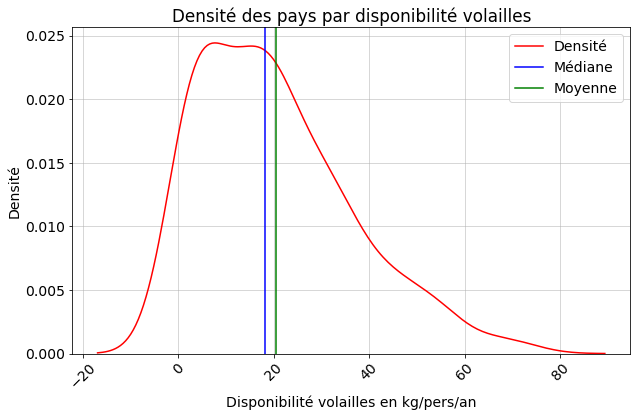

In [35]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
xmedian = np.median(df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'])
xmean = np.mean(df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'])
dispo_volailles_plot = sns.kdeplot(data=df_merged, x = 'Disponibilité alimentaire en quantité (kg/personne/an)', color = 'red')
plt.axvline(xmedian, c='blue')
plt.axvline(xmean, c='g')
plt.xticks(rotation=45)
dispo_volailles_plot.set(xlabel="Disponibilité volailles en kg/pers/an")
dispo_volailles_plot.set(ylabel="Densité")
plt.title("Densité des pays par disponibilité volailles")
plt.legend(labels = ['Densité', 'Médiane', 'Moyenne'])
plt.grid(linewidth = 0.5)

#### 4.1.3 Répartition des pays par tranches de disponibilité de volailles

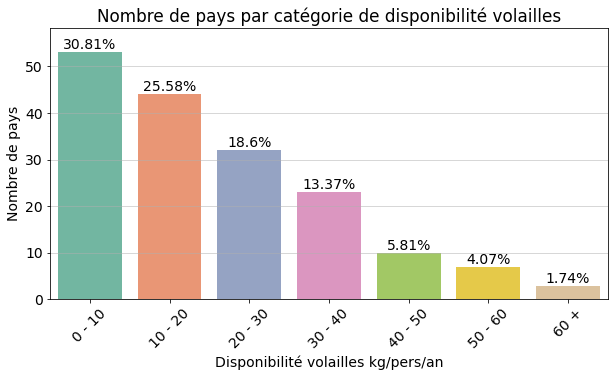

In [36]:
# Création df 'dispo_volailles'
dispo_volailles = dispo_alim.loc[dispo_alim['Produit'] == 'Viande de Volailles', :]

# Pivoter table 'dispo_volailles'
dispo_volailles = dispo_volailles.pivot_table(index='Zone', columns = 'Élément', values = 'Valeur', aggfunc = 'mean')
dispo_volailles.reset_index(inplace = True)

# Discrétisation variable 'Disponibilité alimentaire en quantité (kg/personne/an)'
dispo_volailles['categ_dispo_volailles'] = 0
dispo_volailles.loc[dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 10, 'categ_dispo_volailles'] = '0 - 10'
dispo_volailles.loc[(dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 10) & (dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 20), 'categ_dispo_volailles'] = '10 - 20'
dispo_volailles.loc[(dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 20) & (dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 30), 'categ_dispo_volailles'] = '20 - 30'
dispo_volailles.loc[(dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 30) & (dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 40), 'categ_dispo_volailles'] = '30 - 40'
dispo_volailles.loc[(dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 40) & (dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 50), 'categ_dispo_volailles'] = '40 - 50'
dispo_volailles.loc[(dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 50) & (dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] <= 60), 'categ_dispo_volailles'] = '50 - 60'
dispo_volailles.loc[dispo_volailles['Disponibilité alimentaire en quantité (kg/personne/an)'] > 60, 'categ_dispo_volailles'] = '60 +'

# Trie de la série 'tx_effectif_categ_ca' pr ordre de catégorie de CA
dispo_volailles_sorted = dispo_volailles.sort_values('categ_dispo_volailles')

# Créer série 'effectif_dispo_volailles' pour affichage taux au-dessus des barres
effectif_dispo_volailles = dispo_volailles_sorted['categ_dispo_volailles'].value_counts()

# Créer série 'tx_dispo_volailles'
tx_dispo_volailles = round((effectif_dispo_volailles / len(dispo_volailles_sorted['Zone'])) * 100, 2)
tx_dispo_volailles = tx_dispo_volailles.astype(str) +'%' # Ajout '%' au valeurs

# Graphique
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
dispo_volailles_countplot = sns.countplot(x="categ_dispo_volailles", data = dispo_volailles_sorted)
plt.xticks(rotation=45)
plt.xlabel("Disponibilité volailles kg/pers/an")
plt.ylabel("Nombre de pays")
plt.title("Nombre de pays par catégorie de disponibilité volailles")
plt.grid(axis='y', linewidth = 0.5)

# Ajout des taux au-dessus des barres
dispo_volailles_countplot.bar_label(dispo_volailles_countplot.containers[0], labels = tx_dispo_volailles)
dispo_volailles_countplot.margins(y=0.1) # Adapter la marge

#### 4.1.4 Variance et outliers

Distribution empirique de la disponibilité en volailles :

count    170.000000
mean      20.375471
std       15.875021
min        0.130000
25%        6.610000
50%       18.235000
75%       30.212500
max       72.310000
Name: Disponibilité alimentaire en quantité (kg/personne/an), dtype: float64

Ecart-type = 15.83


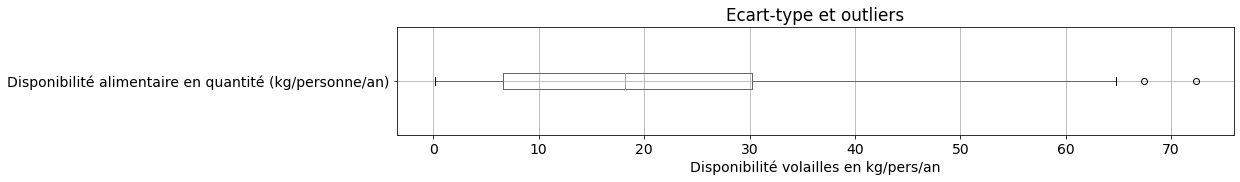

In [37]:
print('Distribution empirique de la disponibilité en volailles :\n')
print(df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].describe())
print('\nEcart-type =', round(df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].std(ddof=0), 2))
plt.figure(figsize=(15,2))
plt.rcParams.update({'font.size': 14})
df_merged.boxplot(column='Disponibilité alimentaire en quantité (kg/personne/an)', vert=False)
plt.xlabel("Disponibilité volailles en kg/pers/an")
plt.title('Ecart-type et outliers')
plt.show()

In [38]:
# Calcul de l'outlier

q1=df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].quantile(0.25)
q3=df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].quantile(0.75)
IQR=q3-q1
outlier_value = round(q3+1.5*IQR, 2)
outlier_value

65.62

In [39]:
df_merged.loc[df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'] > 65.62, :]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Nourriture,Production,Variation de stock,Population en milliers,PIB/hab en $
Zone,,,,,,,,,,,
Israël,234.0,67.39,12.83,27.87,636.0,0.0,556.0,629.0,-10.0,8243.848,42756.825069
Saint-Vincent-et-les Grenadines,243.0,72.31,15.06,25.10,8.0,9.0,8.0,0.0,1.0,109.827,8030.568916


#### 4.1.5 Mesure de l'égalité de la répartition de la disponibilité volailles


Indice de Gini = 0.4287965667381788


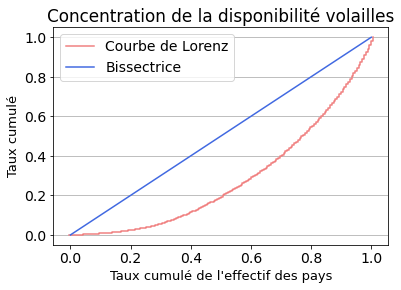

In [40]:
# Courbe de Lorenz
volailles = df_merged['Disponibilité alimentaire en quantité (kg/personne/an)']
volailles_values = df_merged['Disponibilité alimentaire en quantité (kg/personne/an)'].values
n = len(volailles_values)

lorenz = np.cumsum(np.sort(volailles_values)) / volailles_values.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'Courbe de Lorenz', color = 'lightcoral')

# Tracer la bissectrice
plt.plot([0,1], [0,1], label = 'Bissectrice', color = 'royalblue')

plt.legend(loc='upper left')
plt.title("Concentration de la disponibilité volailles")
plt.xlabel("Taux cumulé de l'effectif des pays", fontsize=13)
plt.ylabel("Taux cumulé", fontsize=13)
plt.grid(axis = 'y')

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('\nIndice de Gini =', gini)

plt.show()

Indice de Gini = 0.43 -> Répartition peu égalitaire;

La moitié de la disponibilité volailles est répartie sur 20 % des pays;

La moitié des pays concentre 20 % de la disponibilité en volailles.

#### 4.1.6 Top et flop des pays par disponibilités volailles

In [41]:
# Trie décroissant des pays par disponibilités volailles

dispo_volailles_sorted = dispo_volailles.sort_values('Disponibilité alimentaire en quantité (kg/personne/an)', ascending=False)
display(dispo_volailles_sorted)

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,categ_dispo_volailles
134,Saint-Vincent-et-les Grenadines,0.0,NaN,0.0,243.0,72.31,15.06,25.10,8.0,NaN,9.0,8.0,NaN,0.0,0.0,NaN,NaN,1.0,60 +
72,Israël,NaN,NaN,50.0,234.0,67.39,12.83,27.87,636.0,3.0,0.0,556.0,29.0,629.0,0.0,NaN,1.0,-10.0,60 +
136,Samoa,2.0,NaN,NaN,217.0,64.77,13.68,21.88,15.0,0.0,17.0,13.0,NaN,0.0,0.0,NaN,NaN,2.0,60 +
135,Sainte-Lucie,0.0,NaN,0.0,241.0,56.69,17.86,19.00,11.0,NaN,10.0,10.0,NaN,1.0,0.0,NaN,NaN,0.0,50 - 60
133,Saint-Kitts-et-Nevis,1.0,NaN,0.0,190.0,55.77,11.91,19.22,4.0,0.0,4.0,3.0,NaN,0.0,0.0,NaN,NaN,0.0,50 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Nigéria,0.0,NaN,NaN,2.0,1.01,0.10,0.31,202.0,0.0,0.0,192.0,10.0,201.0,0.0,NaN,NaN,0.0,0 - 10
105,Niger,0.0,NaN,NaN,3.0,0.94,0.20,0.32,21.0,0.0,3.0,20.0,1.0,19.0,0.0,NaN,NaN,0.0,0 - 10
78,Kenya,0.0,NaN,NaN,2.0,0.67,0.14,0.23,35.0,0.0,0.0,34.0,2.0,35.0,0.0,NaN,NaN,0.0,0 - 10
149,Tchad,0.0,0.0,0.0,2.0,0.45,0.10,0.15,7.0,0.0,1.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0,0 - 10


4 îles dans le top 5

5 pays africains dans le flop 5

### 4.2 Evolution population mondiale

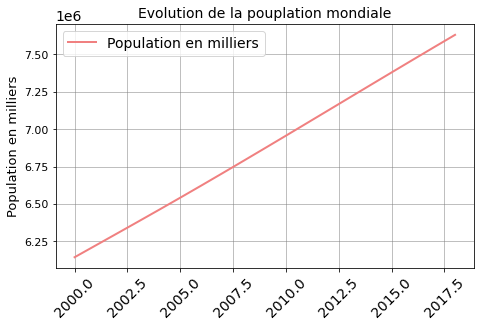

In [42]:
# Agrégation année sur la somme des pouplations des pays 
evolution_pop = pop.groupby('Année')[['Population en milliers']].sum()
evolution_pop.reset_index(inplace = True)

# Graphique
plt.figure(figsize=(7.5, 4.5))
evolution_pop_plot = plt.plot(evolution_pop['Année'], evolution_pop['Population en milliers'], label='Population en milliers', linewidth=2, color='lightcoral')
plt.ylabel("Population en milliers", fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution de la pouplation mondiale", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [43]:
# Trie décroissant des pays par population en 2018 

pop_2018 = pop.loc[pop['Année'] == 2018, :].copy()
pop_2018.reset_index(drop = True, inplace = True)

pop_2018_sorted = pop_2018.sort_values('Population en milliers', ascending=False)
display(pop_2018_sorted)

,Zone,Année,Population en milliers,Type de données,Note
43,"Chine, continentale",2018,1427647.786,Sources internationales sûres,NaN
103,Inde,2018,1352642.280,Sources internationales sûres,NaN
65,États-Unis d'Amérique,2018,327096.265,Sources internationales sûres,NaN
104,Indonésie,2018,267670.543,Sources internationales sûres,NaN
160,Pakistan,2018,212228.286,Sources internationales sûres,NaN
...,...,...,...,...,...
144,Montserrat,2018,4.993,Sources internationales sûres,NaN
94,Îles Falkland (Malvinas),2018,3.234,Sources internationales sûres,NaN
153,Nioué,2018,1.620,Sources internationales sûres,NaN
221,Tokélaou,2018,1.319,Sources internationales sûres,"UNDESA, Population Division – World Population..."


#### Top 3 des zones les plus peuplés en 2018 :
- Chine, 1.4 milliards
- Inde, 1.3 milliards
- US, 327 millions

#### Top 3 des zones les moins peuplés  en 2018 :
- Saint-Siège, 800
- Tokélaou, 1319
- Nioué, 1620

### 4.3 PIB par habitant
#### 4.3.1 Répartition des pays par PIB

count       211.000000
mean      16886.035415
std       25550.733577
min         295.620936
25%        2082.324019
50%        6450.319585
75%       19806.127104
max      173611.814788
Name: PIB/hab en $, dtype: float64


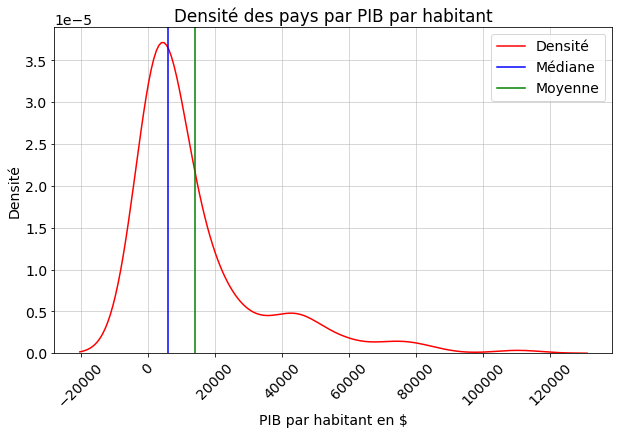

In [49]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.set_palette('Set2')
xmedian = np.median(df_merged['PIB/hab en $'])
xmean = np.mean(df_merged['PIB/hab en $'])
pib_hab_plot = sns.kdeplot(data=df_merged, x = 'PIB/hab en $', color = 'red')
plt.axvline(xmedian, c='blue')
plt.axvline(xmean, c='g')
plt.xticks(rotation=45)
pib_hab_plot.set(xlabel="PIB par habitant en $")
pib_hab_plot.set(ylabel="Densité")
plt.title("Densité des pays par PIB par habitant")
plt.legend(labels = ['Densité', 'Médiane', 'Moyenne'])
plt.grid(linewidth = 0.5)

#### 4.3.2 Variance et outliers

Distribution empirique du PIB/hab par pays :

count       211.000000
mean      16886.035415
std       25550.733577
min         295.620936
25%        2082.324019
50%        6450.319585
75%       19806.127104
max      173611.814788
Name: PIB/hab en $, dtype: float64

Ecart-type = 25490.11


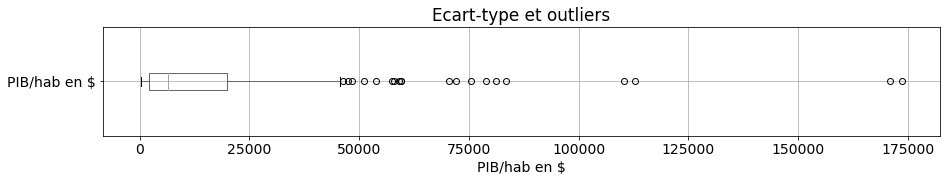

In [45]:
print('Distribution empirique du PIB/hab par pays :\n')
print(pib_hab['PIB/hab en $'].describe())
print('\nEcart-type =', round(pib_hab['PIB/hab en $'].std(ddof=0), 2))
plt.figure(figsize=(15,2))
plt.rcParams.update({'font.size': 14})
pib_hab.boxplot(column='PIB/hab en $', vert=False)
plt.xlabel("PIB/hab en $")
plt.title('Ecart-type et outliers')
plt.show()

On calcule la valeur à partir duquel les pays sont des outliers et on affiche la liste de ces pays.

Outlier = Q3 + (1,5 + IQ)

In [46]:
# Calcul de l'outlier

q1=pib_hab.quantile(0.25)
q3=pib_hab.quantile(0.75)
IQR=q3-q1
outlier_value = round(q3+1.5*IQR, 2)
outlier_value

PIB/hab en $    46391.83
dtype: float64

#### Liste des outliers

In [47]:
# Création d'un df des outliers

pib_outliers = pib_hab[pib_hab['PIB/hab en $'] > 46391.83]
display (pib_outliers.sort_values(by=['PIB/hab en $'], ascending = False))

,Zone,PIB/hab en $
126,Monaco,173611.814788
111,Liechtenstein,170875.739925
24,Bermudes,112877.376531
113,Luxembourg,110203.008202
189,Suisse,83353.597572
84,Îles Caïmanes,81255.112455
41,Chine - RAS de Macao,78985.632288
138,Norvège,75490.688450
95,Islande,71961.532046
94,Irlande,70491.993301


#### 4.3.4 Mesure de l'égalité de la répartition des pays par PIB


Indice de Gini = 0.6444230314989483


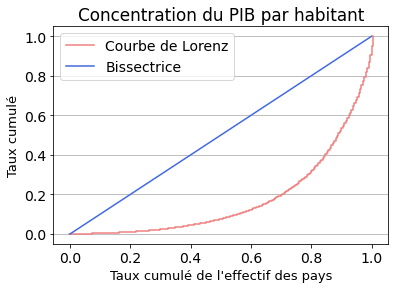

In [48]:
# Courbe de Lorenz
pib_hab_column = pib_hab['PIB/hab en $']
pib_hab_column_values = pib_hab['PIB/hab en $'].values
n = len(pib_hab_column_values)

lorenz = np.cumsum(np.sort(pib_hab_column_values)) / pib_hab_column_values.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'Courbe de Lorenz', color = 'lightcoral')

# Tracer la bissectrice
plt.plot([0,1], [0,1], label = 'Bissectrice', color = 'royalblue')

plt.legend(loc='upper left')
plt.title("Concentration du PIB par habitant")
plt.xlabel("Taux cumulé de l'effectif des pays", fontsize=13)
plt.ylabel("Taux cumulé", fontsize=13)
plt.grid(axis = 'y')

# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('\nIndice de Gini =', gini)

plt.show()

Indice de Gini = 0.64 -> Répartition inégalitaire;

La moitié du PIB par habitant est répartie sur 10 % des pays;

La moitié des pays concentre 10 % du PIB par habitant mondial.